In [2]:
## install for visualization purpose
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
#!pip install gym[atari] > /dev/null 2>&1
!pip install box2d-py
!pip install gym[Box_2D]


Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (45.2.0)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/Reinforcement Learning' # if execution on google colab
import sys
sys.path.append(path)


In [4]:
import numpy as np 


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


from agent_dqn import * 
from memory import *
from wrappers import *


Using TensorFlow backend.


In [5]:
env = gym.make("LunarLander-v2")
env.reset()
print(env.observation_space) 
print(env.action_space)

Box(8,)
Discrete(4)


#DQN

In [0]:
# Training
path = '/content/drive/My Drive/Reinforcement Learning' # if execution on google colab
env = gym.make("LunarLander-v2")
n_games = 500
agent_dqn = DQN_Agent(env=env,input_dim=env.observation_space.shape[0],n_actions=env.action_space.n,
              alpha=0.005,gamma=0.99, epsilon=1,batch_size = 32)
agent_dqn.train(n_games,path)
store_scores(agent_dqn.scores,agent_dqn.avg_scores,path,"dqn_scores.csv") # store scores in csv format

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


episode  0 score = -264.51  Rolling-score = -264.51
episode  1 score = -218.67  Rolling-score = -241.59
episode  2 score = -390.20  Rolling-score = -291.13
episode  3 score = -93.51  Rolling-score = -241.72
episode  4 score = -165.98  Rolling-score = -226.57
episode  5 score = -466.58  Rolling-score = -266.57
episode  6 score = -216.04  Rolling-score = -259.36
episode  7 score = -100.45  Rolling-score = -239.49
episode  8 score = -117.35  Rolling-score = -225.92
episode  9 score = -110.42  Rolling-score = -214.37
episode  10 score = -111.95  Rolling-score = -205.06
episode  11 score = -24.49  Rolling-score = -190.01
episode  12 score = -14.75  Rolling-score = -176.53
episode  13 score = -39.40  Rolling-score = -166.74
episode  14 score = -71.43  Rolling-score = -160.38
episode  15 score = -99.09  Rolling-score = -156.55
episode  16 score = -79.51  Rolling-score = -152.02
episode  17 score = -93.78  Rolling-score = -148.78
episode  18 score = -105.66  Rolling-score = -146.51
episode  19

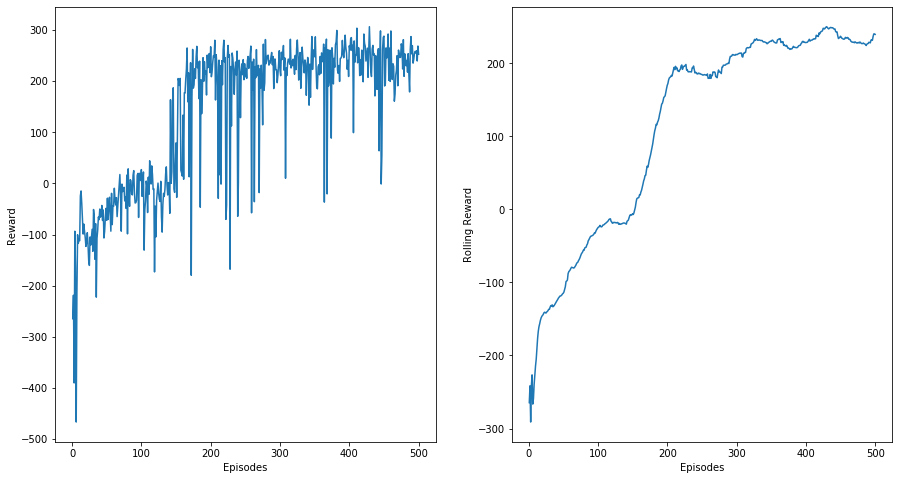

In [0]:
reward_plots(agent_dqn.scores,agent_dqn.avg_scores,n_games)

In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1007'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1007'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
test_agent(agent_dqn,wrap_env(env))
show_video()

In [0]:
agent_random= DQN_Agent(env,input_dim=env.observation_space.shape[0],n_actions=env.action_space.n,
              alpha=0.005,gamma=0.95, epsilon=1,batch_size = 32)
test_agent(agent_random,wrap_env(env))
show_video()

#DDQN

In [0]:
from agent_ddqn import * 

In [0]:
# Training
path = '/content/drive/My Drive/Reinforcement Learning' # if execution on google colab
env = gym.make("LunarLander-v2")
n_games = 500
agent_ddqn = DDQN_Agent(env=env,input_dim=env.observation_space.shape[0],n_actions=env.action_space.n,
              alpha=0.005,gamma=0.99, epsilon=1,batch_size = 32)
agent_ddqn.train(n_games,path)
store_scores(agent_ddqn.scores,agent_ddqn.avg_scores,path,"ddqn_scores.csv") # store scores in csv format

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


episode  0 score = -181.80  Rolling-score = -181.80
episode  1 score = -169.06  Rolling-score = -175.43
episode  2 score = -579.87  Rolling-score = -310.25
episode  3 score = -111.39  Rolling-score = -260.53
episode  4 score = -228.08  Rolling-score = -254.04
episode  5 score = -275.62  Rolling-score = -257.64
episode  6 score = -211.76  Rolling-score = -251.08
episode  7 score = -206.59  Rolling-score = -245.52
episode  8 score = -211.98  Rolling-score = -241.79
episode  9 score = -100.76  Rolling-score = -227.69
episode  10 score = -158.63  Rolling-score = -221.41
episode  11 score = -134.29  Rolling-score = -214.15
episode  12 score = -15.14  Rolling-score = -198.84
episode  13 score = -27.75  Rolling-score = -186.62
episode  14 score = -128.91  Rolling-score = -182.78
episode  15 score = -102.72  Rolling-score = -177.77
episode  16 score = -103.35  Rolling-score = -173.39
episode  17 score = -370.71  Rolling-score = -184.36
episode  18 score = -216.03  Rolling-score = -186.02
episo

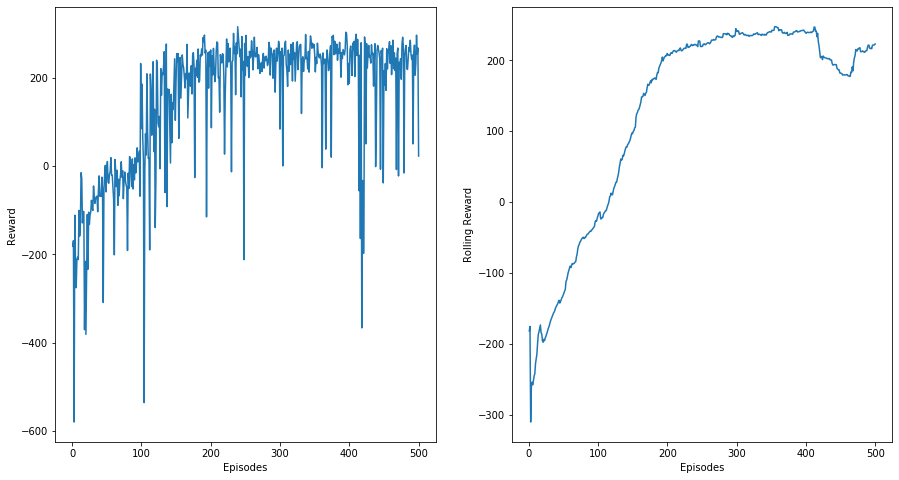

In [0]:
reward_plots(agent_ddqn.scores,agent_ddqn.avg_scores,n_games)

In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1009'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1009'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
test_agent(agent_ddqn,wrap_env(env))
show_video()

#Dueling DQN

In [0]:
from agent_dueling_dqn import * 

In [0]:
# Training
path = '/content/drive/My Drive/Reinforcement Learning' # if execution on google colab
env = gym.make("LunarLander-v2")
n_games = 500
agent_dueling_dqn = Dueling_DQN_Agent(env=env,input_dim=env.observation_space.shape[0],n_actions=env.action_space.n,
              alpha=0.005,gamma=0.99, epsilon=1,batch_size = 32)
agent_dueling_dqn.train(n_games,path)
store_scores(agent_dueling_dqn.scores,agent_dueling_dqn.avg_scores,path,"dueling_dqn_scores.csv") # store scores in csv format

episode  0 score = -338.69  Rolling-score = -338.69
episode  1 score = -413.83  Rolling-score = -376.26
episode  2 score = -7.78  Rolling-score = -253.44
episode  3 score = -105.06  Rolling-score = -216.34
episode  4 score = -224.15  Rolling-score = -217.90
episode  5 score = -113.78  Rolling-score = -200.55
episode  6 score = -211.78  Rolling-score = -202.15
episode  7 score = -91.02  Rolling-score = -188.26
episode  8 score = -141.08  Rolling-score = -183.02
episode  9 score = -312.63  Rolling-score = -195.98
episode  10 score = -254.47  Rolling-score = -201.30
episode  11 score = -193.15  Rolling-score = -200.62
episode  12 score = -292.41  Rolling-score = -207.68
episode  13 score = -141.48  Rolling-score = -202.95
episode  14 score = -285.24  Rolling-score = -208.44
episode  15 score = -297.57  Rolling-score = -214.01
episode  16 score = -270.51  Rolling-score = -217.33
episode  17 score = -471.32  Rolling-score = -231.44
episode  18 score = -361.28  Rolling-score = -238.28
episod

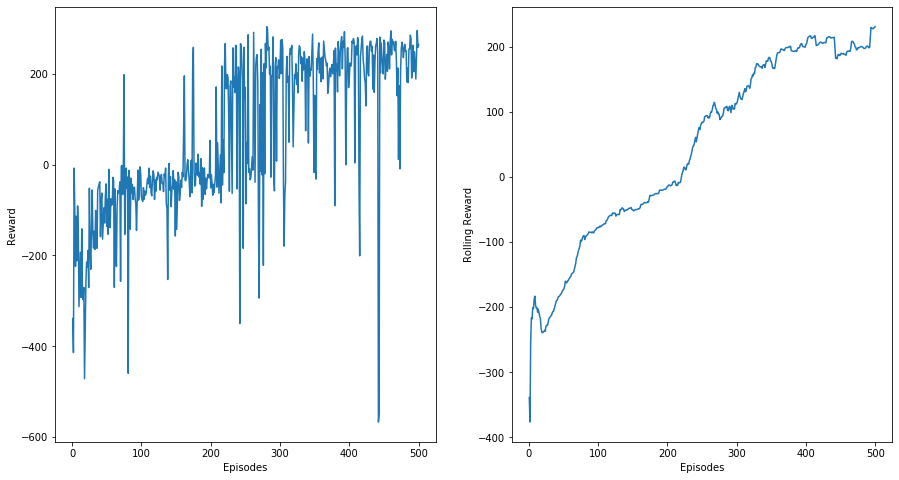

In [0]:
reward_plots(agent_dueling_dqn.scores,agent_dueling_dqn.avg_scores,n_games)

In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1005'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1005'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
test_agent(agent_dueling_dqn,wrap_env(env))
show_video()

#Noisy Nets DQN

In [0]:
from agent_noisy_dqn import *


In [0]:
# Training
path = '/content/drive/My Drive/Reinforcement Learning' # if execution on google colab
env = gym.make("LunarLander-v2")
n_games = 500
agent_noisy = Noisy_DQN_Agent(env=env,input_dim=env.observation_space.shape[0],n_actions=env.action_space.n,
              alpha=0.005,gamma=0.99,batch_size = 32)
agent_noisy.train(n_games,path)
store_scores(agent_noisy.scores,agent_noisy.avg_scores,path,"noisy_dqn_scores.csv") # store scores in csv format














episode  0 score = -261.83  Rolling-score = -261.83
episode  1 score = -75.18  Rolling-score = -168.51
episode  2 score = -665.65  Rolling-score = -334.22
episode  3 score = -146.61  Rolling-score = -287.32
episode  4 score = -142.62  Rolling-score = -258.38
episode  5 score = -234.54  Rolling-score = -254.41
episode  6 score = -330.96  Rolling-score = -265.34
episode  7 score = -293.74  Rolling-score = -268.89
episode  8 score = -91.23  Rolling-score = -249.15
episode  9 score = -139.96  Rolling-score = -238.23
episode  10 score = -183.75  Rolling-score = -233.28
episode  11 score = -161.34  Rolling-score = -227.28
episode  12 score = -255.09  Rolling-score = -229.42
episode  13 score = -27.77  Rolling-score = -215.02
episode  14 score = -125.61  Rolling-score = -209.06
episode  15 score = -122.98  Rolling-score = -203.68
episode  16 score = -218.63  Rolling-score = -204.56
episode  17 score = 17.80  Rolling-score = -192.21
episode  18 score = -525.99  Rolling-score = -20

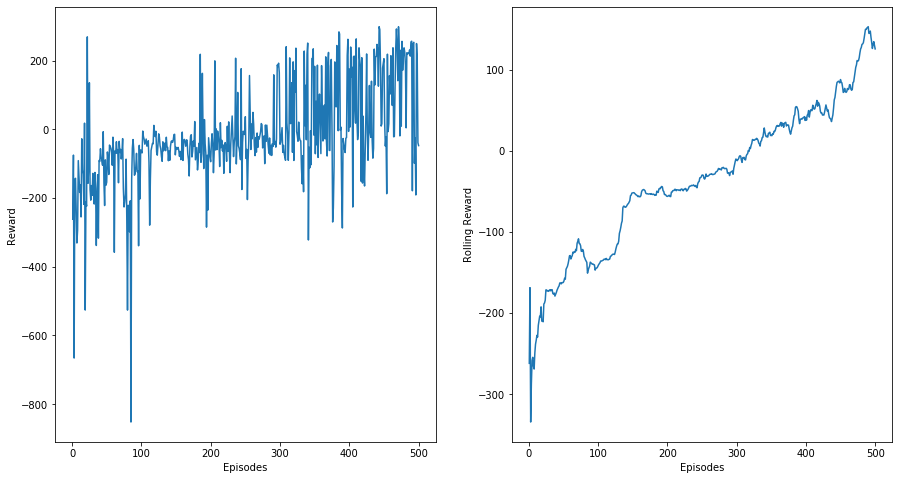

In [0]:
reward_plots(agent_noisy.scores,agent_noisy.avg_scores,n_games)

In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
test_agent(agent_noisy,wrap_env(env))
show_video()

#Final Agent 


In [0]:
from agent_final import * 


In [7]:
# Training
path = '/content/drive/My Drive/Reinforcement Learning' # if execution on google colab
env = gym.make("LunarLander-v2")
n_games = 500
agent_final = Final_Agent(env=env,input_dim=env.observation_space.shape[0],n_actions=env.action_space.n,
              alpha=0.005,gamma=0.99,batch_size = 32)
agent_final.train(n_games,path)
store_scores(agent_final,agent_final.avg_scores,path,"final_scores.csv") # store scores in csv format














episode  0 score = -595.34  Rolling-score = -595.34
episode  1 score = -265.17  Rolling-score = -430.26
episode  2 score = -209.38  Rolling-score = -356.63
episode  3 score = -510.93  Rolling-score = -395.20
episode  4 score = -180.65  Rolling-score = -352.29
episode  5 score = -118.83  Rolling-score = -313.38
episode  6 score = -155.23  Rolling-score = -290.79
episode  7 score = -137.13  Rolling-score = -271.58
episode  8 score = -113.97  Rolling-score = -254.07
episode  9 score = -159.32  Rolling-score = -244.59
episode  10 score = -147.05  Rolling-score = -235.73
episode  11 score = -150.56  Rolling-score = -228.63
episode  12 score = -159.51  Rolling-score = -223.31
episode  13 score = -136.50  Rolling-score = -217.11
episode  14 score = -138.87  Rolling-score = -211.90
episode  15 score = -108.35  Rolling-score = -205.42
episode  16 score = -151.57  Rolling-score = -202.26
episode  17 score = -142.88  Rolling-score = -198.96
episode  18 score = -125.84  Rolling-score 

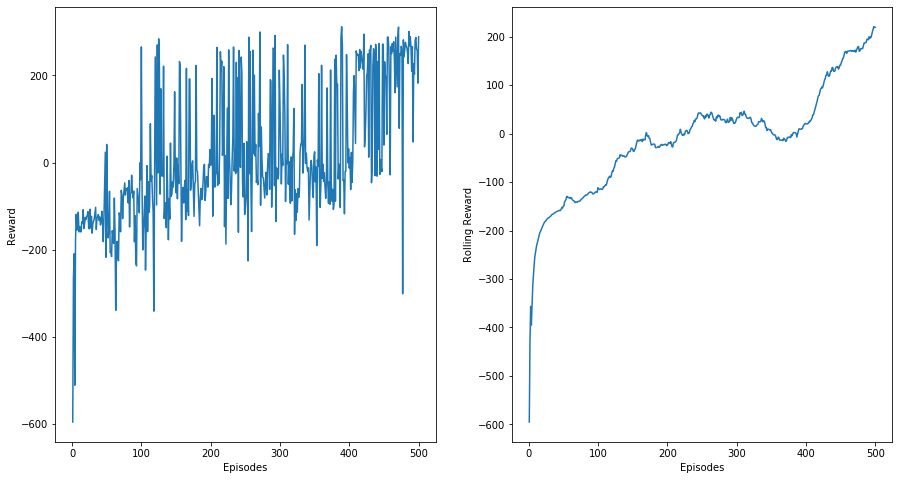

In [8]:
reward_plots(agent_final.scores,agent_final.avg_scores,n_games)

In [9]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [10]:
test_agent(agent_final,wrap_env(env))
show_video()